In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agriculture/Distance_Matrix.csv
/kaggle/input/agriculture/Biomass_History.csv
/kaggle/input/agriculture/test.csv


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [38]:
df1 = pd.read_csv("/kaggle/input/agriculture/Biomass_History.csv")
df2 = pd.read_csv("/kaggle/input/agriculture/Distance_Matrix.csv")

In [39]:
df1.columns


Index(['Index', 'Latitude', 'Longitude', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [40]:
df2.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '2408', '2409', '2410', '2411', '2412', '2413', '2414', '2415', '2416',
       '2417'],
      dtype='object', length=2419)

In [41]:
df1.head()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [42]:
df2 = pd.read_csv("/kaggle/input/agriculture/Distance_Matrix.csv")

In [43]:
df1.columns

Index(['Index', 'Latitude', 'Longitude', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

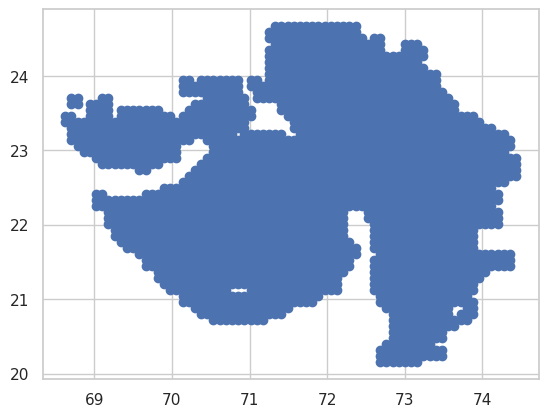

In [44]:
#plt.scatter(df1['Index'],df1['2017'])
plt.scatter(df1['Longitude'],df1['Latitude'])


#plt.scatter(df1['Index'],df1['2017'] ,color ='pink')

# Using Seaborn Scatterplot with continuous hues and sizes For Biomass_history


In [45]:
import seaborn as sns
sns.set_theme(style="whitegrid")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


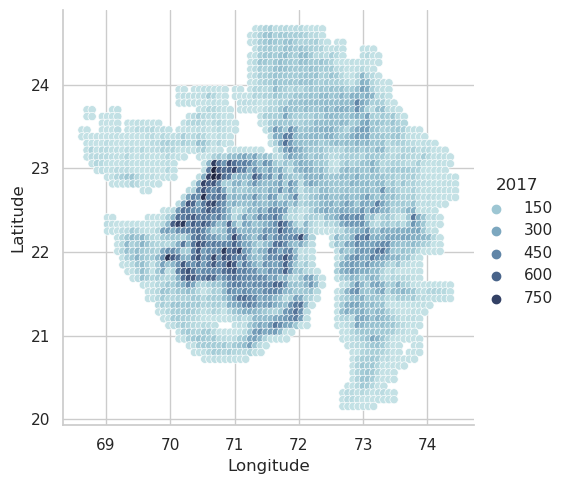

In [46]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df1,
    y="Latitude", x="Longitude",
     hue="2017",                     
    palette=cmap, sizes=(10, 200),
)
#size = ''

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


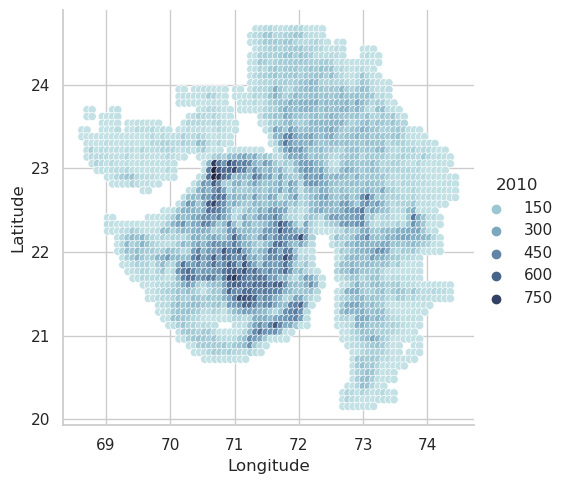

In [47]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df1,
    y="Latitude", x="Longitude",
    hue="2010",
    palette=cmap, sizes=(10, 200),
)

In [48]:
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [49]:

df1_heatmap = df1.pivot("Longitude", "Latitude", "2017")

/tmp/ipykernel_32/271499311.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1_heatmap = df1.pivot("Longitude", "Latitude", "2017")


ValueError: Unknown format code 'd' for object of type 'float'

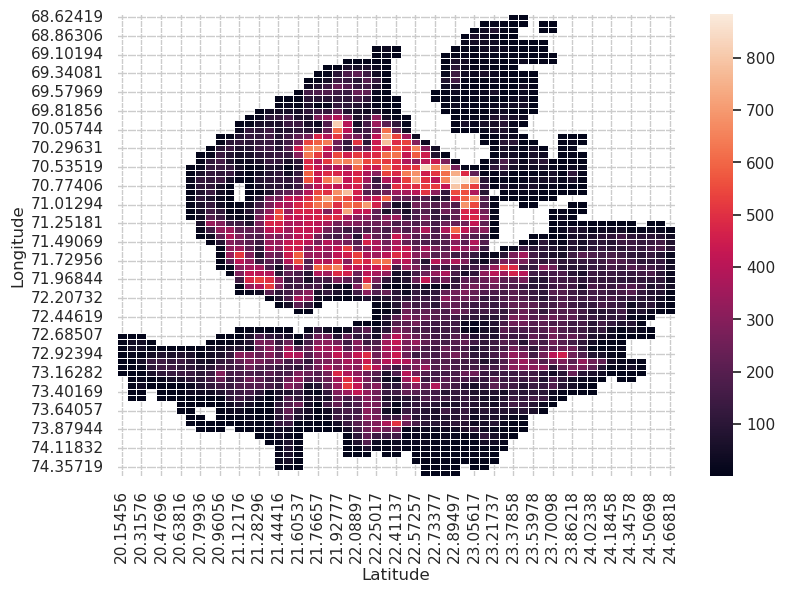

In [50]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(df1_heatmap, annot=True, fmt="d", linewidths=.5, ax=ax)

# Starting Kmeans Clustering 

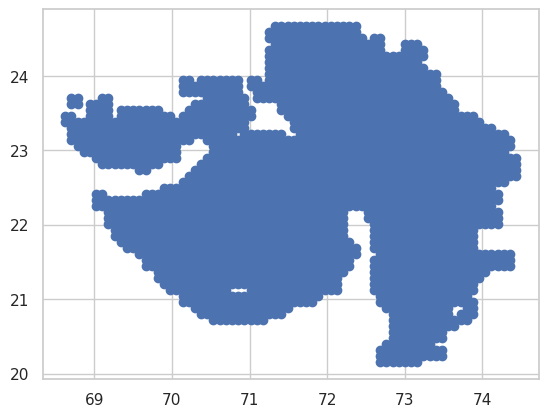

In [51]:
plt.scatter(df1['Longitude'],df1['Latitude'])

In [52]:
km = KMeans(n_clusters= 20)
y_predicted = km.fit_predict(df1[['Longitude','Latitude']])
y_predicted

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([17, 17, 17, ...,  4,  4,  4], dtype=int32)

In [53]:
df1['cluster'] = y_predicted 
df1.head()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,cluster
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296,17
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945,17
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232,17
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352,17
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885,17


In [54]:
km.cluster_centers_

array([[73.68488043, 22.19059609],
       [71.10834405, 21.99312135],
       [72.56403744, 24.162012  ],
       [69.3253011 , 23.20899929],
       [73.11865588, 20.61919529],
       [70.29831983, 21.34527605],
       [72.82630022, 22.6308138 ],
       [69.57513743, 22.01911657],
       [71.09399721, 21.10070297],
       [73.91347581, 22.95282065],
       [72.04452741, 23.35230556],
       [72.94081212, 21.61766136],
       [73.14138   , 23.52303723],
       [70.50190164, 23.51004754],
       [71.91918119, 22.44279034],
       [70.35728658, 22.31842586],
       [71.87973535, 21.51274632],
       [71.61183264, 24.18515571],
       [73.73911317, 21.31727802],
       [71.10205899, 22.86243422]])

In [55]:
cluster_ceter = km.cluster_centers_

In [56]:
import matplotlib.cm as cm

In [57]:
colors = cm.rainbow(np.linspace(0, 1, 20))

# 

In [58]:
for i in range(20):
    globals()['dft'+str(i+1)] = df1[df1.cluster == i]

In [ ]:
for i in range(20):
    plt.figure(i)
    globals()['dft'+str(i+1)].plot(kind='scatter', x='Longitude', y='Latitude', color=colors[i])
    plt.title('Scatter plot for dft'+str(i+1))
    plt.show()

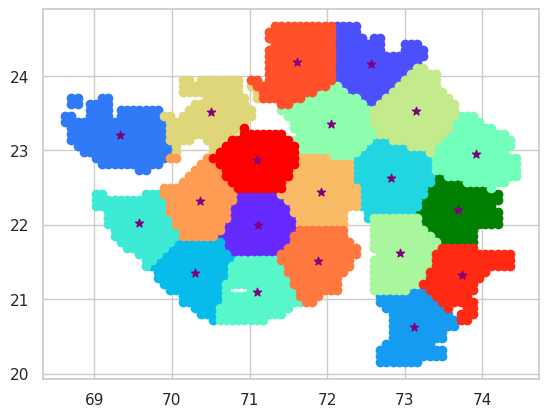

In [67]:
plt.scatter(dft1.Longitude,y =dft1['Latitude'],color = 'green')
plt.scatter(dft2.Longitude,y =dft2['Latitude'],color = colors[1])
plt.scatter(dft3.Longitude,y =dft3['Latitude'],color = colors[2])
plt.scatter(dft4.Longitude,y =dft4['Latitude'],color = colors[3])
plt.scatter(dft5.Longitude,y =dft5['Latitude'],color = colors[4])
plt.scatter(dft6.Longitude,y =dft6['Latitude'],color = colors[5])
plt.scatter(dft7.Longitude,y =dft7['Latitude'],color = colors[6])
plt.scatter(dft8.Longitude,y =dft8['Latitude'],color = colors[7])
plt.scatter(dft9.Longitude,y =dft9['Latitude'],color = colors[8])
plt.scatter(dft10.Longitude,y =dft10['Latitude'],color = colors[9])
plt.scatter(dft11.Longitude,y =dft11['Latitude'],color = colors[10])
plt.scatter(dft12.Longitude,y =dft12['Latitude'],color = colors[11])
plt.scatter(dft13.Longitude,y =dft13['Latitude'],color = colors[12])
plt.scatter(dft14.Longitude,y =dft14['Latitude'],color = colors[13])
plt.scatter(dft15.Longitude,y =dft15['Latitude'],color = colors[14])
plt.scatter(dft16.Longitude,y =dft16['Latitude'],color = colors[15])
plt.scatter(dft17.Longitude,y =dft17['Latitude'],color = colors[16])
plt.scatter(dft18.Longitude,y =dft18['Latitude'],color = colors[17])
plt.scatter(dft19.Longitude,y =dft19['Latitude'],color = colors[18])
plt.scatter(dft20.Longitude,y =dft20['Latitude'],color = colors[19])

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color= 'purple',marker='*',label='centroid')


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = df1[['Index','2017']]

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(scaled_df)

In [ ]:
plt.scatter(df['Index'], ['2017'], c=data['Cluster'])
plt.show()

In [ ]:
df['Cluster'] = kmeans.labels_